In [1]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [3]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [4]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [5]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255

# This time we are defining a four sided polygon to mask
imshape = image.shape
print(imshape)
# vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
#vertices = np.array([[(0,imshape[0]),(0, imshape[0]/2), (imshape[1], imshape[0]/2), (imshape[1],imshape[0])]], dtype=np.int32)
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

(540, 960, 3)


In [12]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 30 # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 #creating a blank to draw lines on

In [13]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [14]:
print(lines)

[[[535 326 838 538]]

 [[551 331 881 538]]

 [[182 490 314 395]]

 [[305 403 352 367]]

 [[360 363 449 291]]

 [[157 494 353 362]]

 [[ 89 539 444 299]]

 [[497 294 574 361]]

 [[158 506 255 436]]

 [[386 344 435 307]]

 [[529 321 576 336]]

 [[329 386 383 341]]

 [[509 300 580 349]]

 [[530 324 788 504]]

 [[508 303 564 335]]

 [[524 317 570 332]]

 [[383 346 444 293]]

 [[526 319 584 359]]

 [[812 496 879 537]]

 [[217 453 258 443]]

 [[337 380 396 331]]

 [[561 337 613 369]]

 [[505 300 546 339]]

 [[255 441 295 409]]

 [[408 329 451 290]]

 [[113 539 161 503]]

 [[804 491 844 515]]]


In [15]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

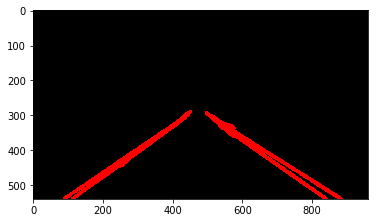

In [18]:
plt.imshow(line_image)
plt.show()

In [16]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

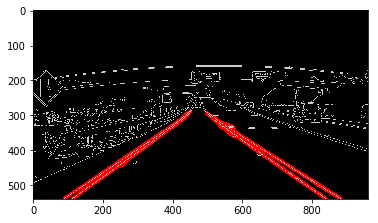

In [17]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
plt.show()